# Analyzing Subjects:
<break> </break>
<font size=4>
The Analyzer, along with the classifier class, provide lots of functionality towards analyzing the Cool Neighbors classification data.
</font>

## Aggregating the Classifications

The Analyzer class object requires the extraction and reduction files produced via the Aggregator class. See the Aggregating example for more details.

In [1]:
# Imports
import os
from DataToolkit.Aggregator import Aggregator

# For more details about Aggregating, see the Aggregating example.

# This is the workflow ID and version for the Backyard Worlds: Cool Neighbors project's Launch-0 workflow.
workflow_id = 24299
version = 1.6

# Default names for the CSV files that are exported via Zooniverse's data exports tab.
classifications_csv = "backyard-worlds-cool-neighbors-classifications.csv"
workflows_csv = "backyard-worlds-cool-neighbors-workflows.csv"
config_directory = "Config"
extractions_directory = "Extractions"
reductions_directory = "Reductions"

# Check whether the aggregated files already exist for this workflow and version
aggregator = Aggregator(classifications_csv_filename=classifications_csv, workflow_csv_filename=workflows_csv, config_directory=config_directory, extractions_directory=extractions_directory, reductions_directory=reductions_directory)

if(os.path.exists("{}/question_extractor_workflow_{}_V{}.csv".format(aggregator.extractions_directory, workflow_id, version)) and os.path.exists("{}/question_reducer_workflow_{}_V{}.csv".format(aggregator.reductions_directory, workflow_id, version))):
    print("Aggregated files already exist, skipping aggregation.")
else:
    print("Aggregating...")
    aggregator.aggregateWorkflow(workflow_id=workflow_id, v=version)
    print("Aggregation complete.")

Aggregated files already exist, skipping aggregation.


## Creating the Analyzer
The analyzer will be your all-inclusive tool for working with the panoptes_aggregation results, generated via the Aggregator.

In addition to the analzyer's functionality, it also has a Classifier instance within it which itself has functionality regarding the accuracies of user's and weighting classifications by user accuracy in the candidate selection process.


In [2]:
# Import
from DataToolkit.Analyzer import Analyzer

# Provide the filepaths of the aggregated files
extracted_file = "Extractions/question_extractor_workflow_24299_V1.6.csv"
reduced_file = "Reductions/question_reducer_workflow_24299_V1.6.csv"

# Subject file is optional but highly recommended, as it allows for you to work with subjects offline
# and is generally faster than the online version.
subject_file = "backyard-worlds-cool-neighbors-subjects.csv"
if(subject_file is not None):
    # If an offline analyzer has already been created and saved, you can load it instead of creating it again. You cannot
    # load an online analyzer.
    if (os.path.exists("analyzer.pickle")):
        print("Loading Analyzer...")
        analyzer = Analyzer.load()
    else:
        print("Creating Analyzer...")
        # Providing a subjects_file will default the analyzer to being offline.
        analyzer = Analyzer(extracted_file, reduced_file, subject_file)
else:
    # Not providing a subjects_file will default the analyzer to being online.
    analyzer = Analyzer(extracted_file, reduced_file)

Loading Analyzer...
Loaded Analyzer object from 'analyzer.pickle'


## Getting Analyzer Information

Lots of different types of information can be extracted out of the classification data. Provided below are useful catgegorical examples:

### Getting Subjects and Users
Subject ids, usernames, and user ids are able to be retrieved via the Analyzer as well as their panoptes-client object equivalents.

In [6]:
# Import
from unWISE_verse.Spout import Spout

# Get the valid subject ids from the workflow classifications.
subject_ids = analyzer.getSubjectIDs()
print(f"Valid Subjects:", *subject_ids[0:10], "...\n")

# Get the usernames of the users who have classified.
usernames = analyzer.getUniqueUserIdentifiers(user_identifier="username")
print(f"Usernames:", *usernames[0:10], "...\n")

# Get the user ids of the users who have classified.
# include_logged_out_users must be false since logged-out users do not have user ids.
user_ids = analyzer.getUniqueUserIdentifiers(include_logged_out_users=False, user_identifier="user id")

# Get the top usernames (two modes: percentile or classification threshold).
top_usernames = analyzer.getTopUsernames(classification_threshold=None, percentile=98)
print(f"Top usernames: {top_usernames}\n")

# Login to Zooniverse with Spout to access the next two functions.
# You will need to log in to Spout to use these functions or use online mode.
login = Spout.requestLogin()
Spout.loginToZooniverse(login)
print()
# Get the subject object for a specific subject. Not disabled for offline mode, but you will need to log in to Spout
# to get the subject object.
subject_object = analyzer.getSubject(subject_ids[0])
print(f"Subject object for subject {subject_ids[0]}: {subject_object}\n")

# Get the user object for a specific user. Not disabled for offline mode, but you will need to log in to Spout
# to get the user object.
user_object = analyzer.getUser(usernames[0])
print(f"User object for user {usernames[0]}: {user_object}\n")

# Gets the user objects of the top users (two modes: percentile or classification threshold).
top_user_objects = analyzer.getTopUsers(classification_threshold=None, percentile=98)
print(f"Top user objects: {top_user_objects}\n")

Valid Subjects: 89099782 89099844 89099869 89100067 89100074 89100144 89100157 89100208 89100248 89100284 ...

Usernames: robbinsg NoahSchapera.9 pga99 not-logged-in-f6496faa335471e8e9d4 Albionaa Night-Vega not-logged-in-99db418729914db69dc7 Herakles Marcossilva vinnyzo ...

Top usernames: ['ConC', 'Vidar87', 'LizzethRuiz', 'Rattus', 'pga99', 'Borvo', 'BlueWhovian', 'VinodThakur', 'SAlexandrov', 'chulej', 'ShyBay', 'Marcossilva', 'Rosie_Oliver', 'Geert_D', 'nilium', 'wangqintao', 'pathfinder7567', 'ARTEM1', 'BruceHorlyck', 'eantonio2023', 'Barbalbero', 'Herakles', 'jcstew', 'graham_d', 'shocko61', 'Sharp88', 'leelaht', 'canopus228', 'RoksolanaKot', 'Harborist', 'Knightrider95', 'malcolmf', 'EllieSparke', 'Gronagor', 'chrostek', 'thorsteinn', 'Kennycavanaugh', 'MartinKb', 'jiipee', 'Naoufel67', 'Jesskantine', 'BLGoodwin', 'autumnwisp', 'Jose_Campos', 'MrAgent99', 'kiri2ll']

Login credentials loaded.

Subject object for subject 89099782: <Subject 89099782>

User object for user robbinsg

### Number of Classifications

These functions pertain to getting the total number of classifications of all users, or some specific subset of users.

In [6]:
# Get the total number of classifications in the aggregated files.
print(f"Number of classifications: {analyzer.getTotalClassifications()}\n")

# Get the total number of classifications for a subjects which have at least n classifications.
n = 5
print(f"Number of classifications for subjects with at least {n} classifications: {analyzer.getSubsetOfTotalClassifications(minimum_subject_classification_count=5)}\n")

# Get the total number of classifications done by a specific user.
user_classification_count = analyzer.getTotalClassificationsByUser(usernames[0])
print(f"Total classifications by user {usernames[0]}: {user_classification_count}\n")

# Get the total number of classifications done by the top users (two modes: percentile or classification threshold).
top_users_classification_count = analyzer.getTotalClassificationsByTopUsers(classification_threshold=None, percentile=98)
print(f"Total classifications by top users: {top_users_classification_count}\n")

Number of classifications: 346646

Number of classifications for subjects with at least 5 classifications: 346496

Total classifications by user robbinsg: 120

Total classifications by top users: 220892



### Classifications
These functions allow you to obtain the classification information from specific subjects and specific users. Classifications are represented as a dictionary with keys: "yes", "no", and "total". These correspond to the binary choice users make in the task question on the Cool Neighbors' classification task.

In [18]:
# Get the classifications done for a specific subject.
subject_classifications = analyzer.getClassificationsForSubject(subject_ids[0])
print(f"Classifications for subject {subject_ids[0]}: {subject_classifications}\n")

# Get classifications done by a specific user. 
# Since a user could classify many subjects, a Pandas Dataframe of the classifications is provided.
user_classifications = analyzer.getClassificationsByUser(usernames[0])
print(f"Classifications by user {usernames[0]}: \n{user_classifications}\n")

Classifications for subject 89099782: {'yes': 13, 'no': 1, 'total': 14}

Classifications by user robbinsg: 
        classification_id user_name    user_id  workflow_id task  \
0               493164038  robbinsg  2129944.0        24299   T0   
1               493164129  robbinsg  2129944.0        24299   T0   
2               493164157  robbinsg  2129944.0        24299   T0   
3               493164186  robbinsg  2129944.0        24299   T0   
4               495610675  robbinsg  2129944.0        24299   T0   
...                   ...       ...        ...          ...  ...   
179747          499593040  robbinsg  2129944.0        24299   T0   
179748          499593044  robbinsg  2129944.0        24299   T0   
285414          500904743  robbinsg  2129944.0        24299   T0   
285417          500904766  robbinsg  2129944.0        24299   T0   
285423          500904979  robbinsg  2129944.0        24299   T0   

                     created_at  subject_id           extractor  data.no  \

### Plotting Classifications
Plot classification data in a variety of different and useful ways.

Plotting classification distribution for all valid subjects...



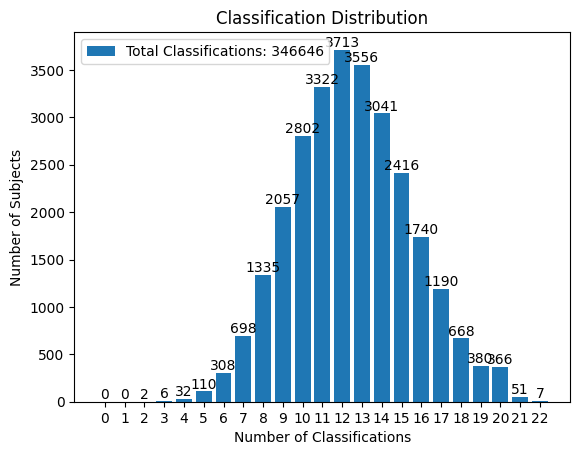

Plotting classifications for subject 89099782...



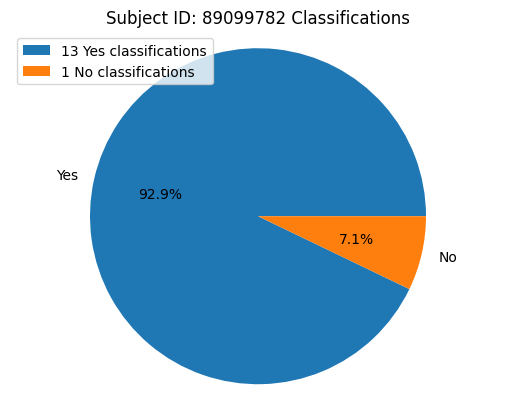

Plotting classifications done by top users...



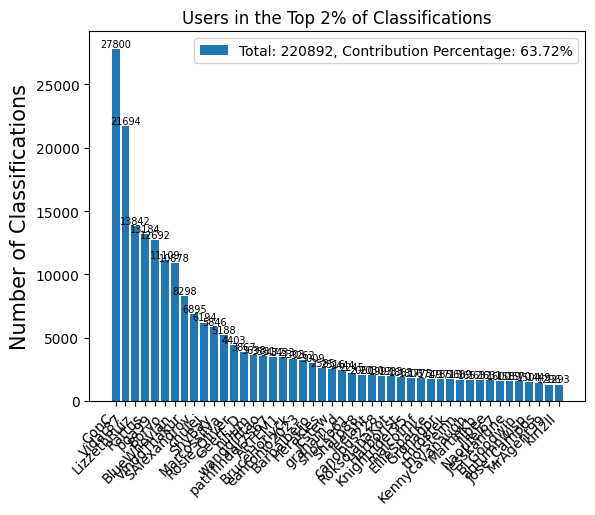

Plotting classification timeline...



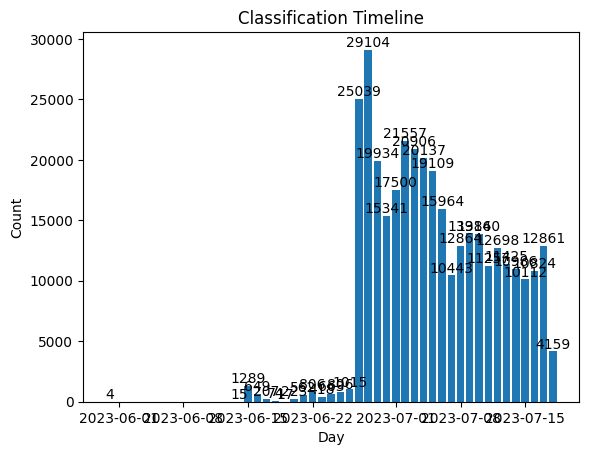

In [19]:
# Plot the classification distribution for all subjects.
total_subject_count = 27800
print("Plotting classification distribution for all valid subjects...\n")
analyzer.plotClassificationDistribution(total_subject_count=total_subject_count, title="Classification Distribution")

# Plot the classifications done for a specific subject.
print(f"Plotting classifications for subject {subject_ids[0]}...\n")
analyzer.plotClassificationsForSubject(subject_ids[0])

# Plot the classifications done by the top users (two modes: percentile or classification threshold).
print("Plotting classifications done by top users...\n")
analyzer.plotTotalClassificationsByTopUsers(classification_threshold=None, percentile=98)

# Plot classification timeline
print("Plotting classification timeline...\n")
analyzer.plotClassificationTimeline()

### Classification Times
Plotting information about classification times and statistics related to the classification times of users.

Plotting time histogram for all classifications...



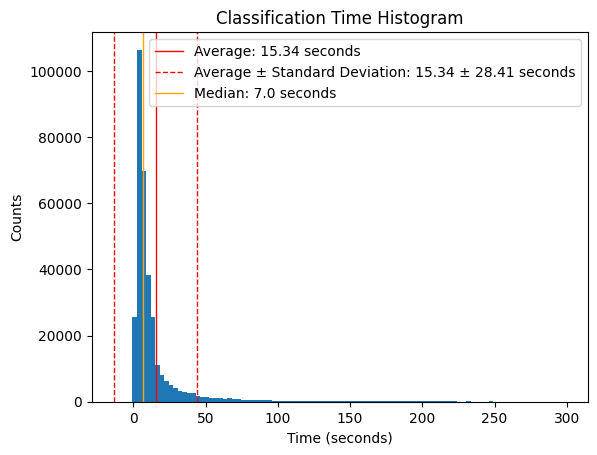

Plotting time histogram for user robbinsg...



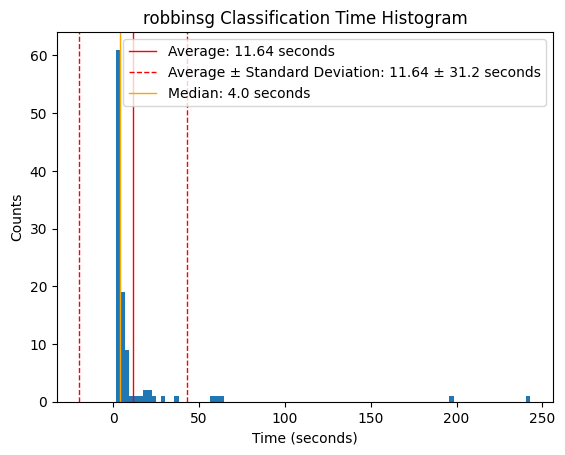

In [9]:
# Plot the time histogram for all classifications/users. Since there are users who have too
# few consecutive classifications, which brings up a warning, I am ignoring warnings for this function.
print("Plotting time histogram for all classifications...\n")
from DataToolkit.Decorators import ignore_warnings 
# This decorator will ignore the warnings provided by users with insufficient consecutive classifications
ignore_warnings(analyzer.plotTimeHistogramForAllClassifications)()

# Plot the time histogram for a specific user.
print(f"Plotting time histogram for user {usernames[0]}...\n")
analyzer.plotTimeHistogramForUserClassifications(usernames[0])

# Compute the time statistics for a specific user.
user_average_time, user_std_time, user_median_time = analyzer.computeTimeStatisticsForUser(usernames[0])
print(f"Average time for user {usernames[0]}: {round(user_average_time,2)} seconds\nStandard deviation: {round(user_std_time,2)} seconds\nMedian: {round(user_median_time,2)} seconds\n")


### Subject Dataframes
All csv file information is saved in the Analyzer object as Pandas Dataframes. There are three different csv sources: the subjects file, the extracted file, and the reduced file. 

-The subjects file is the exported subject csv from the Data Exports tab of Zooniverse, this is provided when using the Analyzer in offline mode. However, you can still generate subject dataframes in the online version as it will gather all the metadata information from the subject objects it gathered upon creation.

-The extracted file is the individual classifications produced via the Aggregator. This contains information regarding every classification of every subject by the user who performed the classification.

-The reduced file is the combined classifications produced via the Aggregator. This contains the combined information regarding the total number of "yes" classifcations and "no" classifications by all the users for each individual subject.

This information is accessible as needed via the following functions:

In [24]:
# Get the subject dataframe for a specific subject.
subject_dataframe_from_subject_file = analyzer.getSubjectDataframe(subject_ids[0], dataframe_type="default")
print(f"Default Subject dataframe for subject {subject_ids[0]}: \n{subject_dataframe_from_subject_file}\n")

# Get the subject dataframe for a specific subject from the extracted file.
subject_dataframe_from_extracted_file = analyzer.getSubjectDataframe(subject_ids[0], dataframe_type="extracted")
print(f"Extracted Subject dataframe for subject {subject_ids[0]}: \n{subject_dataframe_from_extracted_file}\n")

# Get the subject dataframe for a specific subject from the reduced file.
subject_dataframe_from_reduced_file = analyzer.getSubjectDataframe(subject_ids[0], dataframe_type="reduced")
print(f"Reduced Subject dataframe for subject {subject_ids[0]}: \n{subject_dataframe_from_reduced_file}\n")

# Combine subject dataframes.
subject_dataframe_0 = analyzer.getSubjectDataframe(subject_ids[0], dataframe_type="default")
subject_dataframe_1 = analyzer.getSubjectDataframe(subject_ids[1], dataframe_type="default")
combined_subject_dataframe = analyzer.combineSubjectDataframes([subject_dataframe_0, subject_dataframe_1])
print(f"Combined subject dataframe: \n{combined_subject_dataframe}\n")

# Save the subject dataframe to a CSV file.
print("Saving subject dataframe to file...")
analyzer.saveSubjectDataframeToFile(combined_subject_dataframe, "combined_subject_dataframe.csv")
print("Subject dataframe saved. \n")

# Load the subject dataframe from a CSV file.
combined_subject_dataframe_from_file = analyzer.loadSubjectDataframeFromFile("combined_subject_dataframe.csv")
print(f"Combined subject dataframe from file: \n{combined_subject_dataframe_from_file}\n")

Default Subject dataframe for subject 89099782: 
         ID           RA          DEC                         FOV  \
0  89099782  218.2715973  30.28958283  ~120.0 x ~120.0 arcseconds   

                                                IRSA #SCALE  \
0  [IRSA](+tab+https://irsa.ipac.caltech.edu/appl...     22   

                                              SIMBAD  \
0  [SIMBAD](+tab+http://simbad.u-strasbg.fr/simba...   

                                              VizieR #ADDGRID #BITMASK  ...  \
0  [VizieR](+tab+https://vizier.u-strasbg.fr/viz-...        1        1  ...   

  #TARGET ID                       Data Source #PNG_DIRECTORY  \
0          5  [unWISE](+tab+http://unwise.me/)    Launch pngs   

                                      Legacy Surveys  \
0  [Legacy Surveys](+tab+https://www.legacysurvey...   

           unWISE Pixel Scale  \
0  ~2.75 arcseconds per pixel   

                                 Decimal Year Epochs Galactic Coordinates  \
0  Frame 1: 2010.54, Fram

### Subject Information
Access subject metadata to perform actions on the subjects as needed.

In [31]:
# Verify that a subject exists within the Analyzer.
subject_exists = analyzer.subjectExists(subject_ids[0])
print(f"Subject {subject_ids[0]} exists within the Analyzer: {subject_exists} \n")

# Get the subject metadata for a specific subject.
subject_metadata = analyzer.getSubjectMetadata(subject_ids[0])
print(f"Subject metadata for subject {subject_ids[0]}: \n{subject_metadata}\n")

# Get a particular subject metadata field for a specific subject.
subject_metadata_field = analyzer.getSubjectMetadataField(subject_ids[0], "ID")
print(f"Subject metadata field for subject {subject_ids[0]}: {subject_metadata_field}\n")

# Show the subject in wise-view. 
# open_in_browser = True enforces a delay of 10 seconds before finishing to avoid accidently spamming WiseView
print(f"Showing subject {subject_ids[0]} in wise-view...\n")
print(f"WiseView link for subject {subject_ids[0]}: {analyzer.showSubjectInWiseView(subject_ids[0], open_in_browser=True)}\n")

# Get the SIMBAD link for a specific subject.
simbad_link = analyzer.getSimbadLinkForSubject(subject_ids[0])
print(f"SIMBAD link for subject {subject_ids[0]}: {simbad_link}\n")

Subject 89099782 exists within the Analyzer: True 

Subject metadata for subject 89099782: 
{'ID': '89099782', 'RA': '218.2715973', 'DEC': '30.28958283', 'FOV': '~120.0 x ~120.0 arcseconds', 'IRSA': '[IRSA](+tab+https://irsa.ipac.caltech.edu/applications/finderchart/servlet/api?mode=getResult&subsetsize=11.7333&locstr=218.2715973+30.28958283&survey=DSS%2CSDSS%2C2MASS%2CSEIP%2CWISE)', '#SCALE': '22', 'SIMBAD': '[SIMBAD](+tab+http://simbad.u-strasbg.fr/simbad/sim-coo?Coord=218.2715973+30.28958283&Radius=84.8528137423857&Radius.unit=arcsec)', 'VizieR': '[VizieR](+tab+https://vizier.u-strasbg.fr/viz-bin/VizieR?-c=218.2715973+30.28958283&-c.bs=15x15&-out.add=_r&-out.add=_RAJ%2C_DEJ&-sort=_r&-to=&-out.max=20&-meta.ucd=2&-meta.foot=1&-oc.form=d)', '#ADDGRID': '1', '#BITMASK': '1', '#EBV SFD': '0.016346944', 'WISEVIEW': '[WiseView](+tab+http://byw.tools/wiseview#ra=218.2715973&dec=30.28958283&size=118.25&band=3&speed=150&minbright=-41.98477630615236&maxbright=58.01522369384763&window=1.5&diff_

## Running Queries

The Analyzer object also has built in functionality, via the Searcher class, to allow for queries from both SIMBAD and Gaia for each subject's coordinates and field of view.

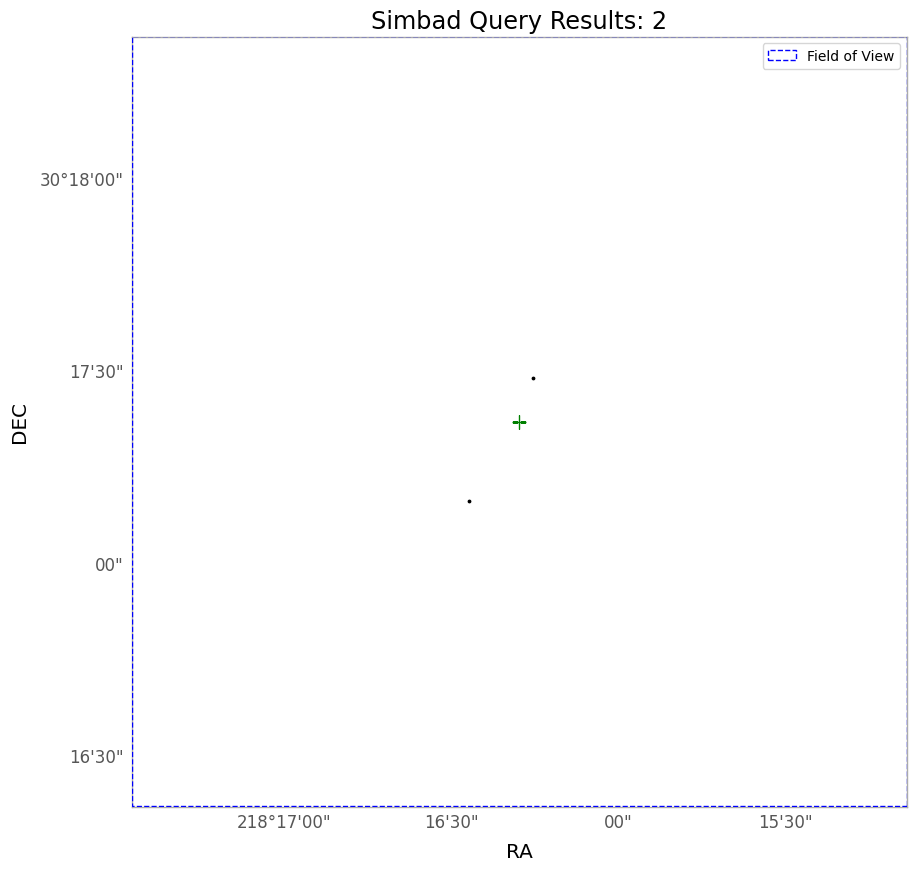

SIMBAD query for subject 89099782: 
 MAIN_ID         RA      ...          OTYPES          SCRIPT_NUMBER_ID
             hourangle   ...                                          
---------- ------------- ... ------------------------ ----------------
LP  325-54 14 33 05.0238 ... LM*|LM*|NIR|PM*|**|*|Opt                0
LP  325-55 14 33 05.7856 ...     LM*|NIR|PM*|**|*|Opt                0



In [3]:
# Note: If you run these queries with plot=True in standard Python, you can interact with the plot and hover over points 
# to tell you their given designations in SIMBAD

# Get the subject IDs for the queries.
subject_ids = analyzer.getSubjectIDs()

# Get the SIMBAD query for a specific subject.
simbad_query = analyzer.getSimbadQueryForSubject(subject_ids[0], plot=True)
print(f"SIMBAD query for subject {subject_ids[0]}: \n{simbad_query}\n")